In [1]:
#pip install pandas numpy tsplib95 matplotlib

In [2]:
import pandas as pd
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
from math import sqrt
import tsplib95

In [3]:
with open ('turk15.tsp') as f:
    problem = tsplib95.read(f)

In [4]:
print('Problem adı: '+problem.name)
print('Şehir sayısı: '+str(problem.dimension))

Problem adı: turkey15
Şehir sayısı: 15


In [5]:
nodes=list(problem.node_coords.values())

#nodes

In [6]:
#x ve y koordinatlarini diziye ata
node_x=[]
node_y=[]

for i in nodes:
    node_x.append(i[0])
    node_y.append(i[1])

#node_y

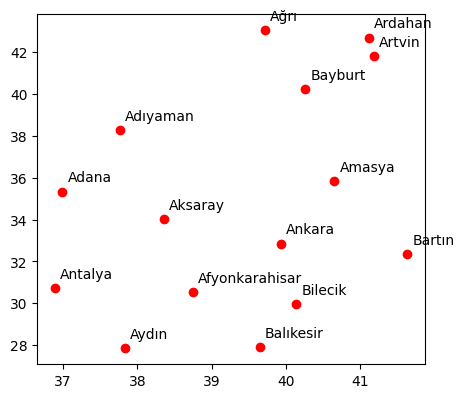

In [7]:
cities = ['Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 
          'Ardahan', 'Artvin', 'Aydın', 'Balıkesir', 'Bartın', 'Bayburt', 'Bilecik']
fig = plt.figure(figsize=(5, 10))
ax = plt.subplot(2, 1, 1)
trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                       x=0.05, y=0.10, units='inches')
i = 0
for x, y in zip(node_x, node_y):
    plt.plot(x, y, 'ro')
    plt.text(x, y, cities[i], transform=trans_offset)
    i += 1
    

plt.show()
#atanan x ve y noktalarini cizdir
#plt.scatter(node_x, node_y, marker='s', s=5)

In [8]:
#oklid ile 2 nokta arasi mesafeyi hesaplama
a=[0,0]
b=[5,5]
distance = sqrt(pow(a[0]-b[0], 2) + pow(a[1]-b[1], 2))
distance

7.0710678118654755

In [9]:
#oklid ile 2 nokta arasi mesafeyi hesaplama - fonksiyon
def euclidean_dist(a,b):
    ans=sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    return ans
euclidean_dist(a, b)

7.0710678118654755

In [10]:
#butun noktalar arasindaki mesafeleri hesapla
temp=[]

for i in nodes:
    temp_row=[]
    for j in nodes:
        temp_row.append(euclidean_dist(i,j))
    temp.append(temp_row)
    #print(temp_row)

#temp

In [11]:
#dataframe e satir sayisi ekle
node_name= []
for i in range(1,16):
    node_name.append(i)

#node_name


In [12]:
#olusturulan mesafeyi dataframe e cevir gorsellestirme vs kolay olmasi icin
Dist=pd.DataFrame(temp, columns=node_name, index=node_name)

#Dist

In [13]:
Dist=pd.DataFrame(temp, columns=node_name, index=node_name)
Dist

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0.000000,3.039161,5.112494,8.185157,1.895521,3.693995,3.846297,4.621082,8.443418,7.725037,7.536956,7.901215,5.525360,5.882601,6.217081
2,3.039161,0.000000,7.803057,5.162451,4.292144,3.782288,5.838262,7.609895,5.554044,4.929391,10.430235,10.550663,7.089464,3.170568,8.634489
3,5.112494,7.803057,0.000000,12.556751,3.511723,5.630275,2.602845,1.868689,12.396713,11.548550,2.842974,2.789193,3.396233,9.806947,1.498566
4,8.185157,5.162451,12.556751,0.000000,9.130356,7.280934,10.202372,12.658120,1.443087,1.916716,15.325746,15.160119,10.890583,2.882950,13.087066
5,1.895521,4.292144,3.511723,9.130356,0.000000,2.918938,1.958009,3.621740,9.105213,8.294118,6.202685,6.264264,3.680897,6.484597,4.423901
6,3.693995,3.782288,5.630275,7.280934,2.918938,0.000000,3.065746,6.352322,6.885383,6.013402,8.473045,8.002725,3.634611,4.407289,5.882151
7,3.846297,5.838262,2.602845,10.202372,1.958009,3.065746,0.000000,3.717687,9.920428,9.056677,5.432320,4.967897,1.777751,7.377384,2.887646
8,4.621082,7.609895,1.868689,12.658120,3.621740,6.352322,3.717687,0.000000,12.710960,11.909500,3.020017,3.945884,5.009192,10.089450,3.333182
9,8.443418,5.554044,12.396713,1.443087,9.105213,6.885383,9.920428,12.710960,0.000000,0.882780,15.217687,14.881791,10.383029,2.621622,12.766903
10,7.725037,4.929391,11.548550,1.916716,8.294118,6.013402,9.056677,11.909500,0.882780,0.000000,14.375775,14.013772,9.500663,1.845644,11.895550


In [14]:
###### PARAMETRELER

P_size=100  # nufüs büyüklüğü
N_gen=500  # nesil sayısı

p_crossover=0.9  # crossover olasılığı
p_mutation=0.1  # mutation olasılığı

K=5  # turnuva seçim büyüklüğü
E=10  # elit liste büyüklüğü

In [15]:
rnd_sol = node_name # [1..15] sehir numaralari
def objective(rnd_sol):

    obj=0

    for i in range(len(rnd_sol)):
        Start_node=rnd_sol[i] #rnd_sol[0] = 1

        if i+1==len(rnd_sol):
            End_node=rnd_sol[0] # eger i=15 oldugunda ilk node a git
        else:
            End_node=rnd_sol[i+1] # degilse birer birer devam et

        obj+=Dist[Start_node][End_node]
        
    return obj

#objective(rnd_sol)

In [16]:
#rasgele 100 tane sonucun uretilmesi. ilk populasyonun tanimlanmasi(100 tane gidis guzergahinin tanimlanmasi)
def initialize():

    Loc_Set=list(Dist.columns)

    Pop_list=[]

    for i in range(P_size):
        rnd_sol = rd.sample(Loc_Set, len(Loc_Set))
        Pop_list.append((rnd_sol, objective(rnd_sol)))

    return Pop_list

#initialize()

In [17]:
#cozumleri en iyiye gore siralama. en iyi 10u(E=10 tanimlamistik) alip elit liste olusturmak
def elitism(Pop_list):

    Pop_list_ordered=sorted(Pop_list, key=lambda x:x[1])

    Elit_list=[]

    i=0
    while len(Elit_list)<E:
        solution=Pop_list_ordered[i][0]
        Elit_add=(solution, objective(solution))
        if Elit_add not in Elit_list:
            Elit_list.append(Elit_add)
        i+=1

    return Elit_list

In [18]:
#ebeveyn secimi: turnuva ile turnuva secme boyutu kadar (k=5 secmistik). 2 elemanli ebeveyn listesi hazirlamak
def selection_op():

    parents=[]

    while len(parents)<2:

        tournament_selection_pool=[]

        while len(tournament_selection_pool)<K:

            index=np.random.randint(0, len(Pop_list))

            
            tournament_selection_pool.append(Pop_list[index])
            
        tournament_selection_pool_ordered=sorted(tournament_selection_pool, key=lambda x: x[1])

        parents.append(tournament_selection_pool_ordered[0])
        
    return parents  

In [19]:
#crossover ile ebeveynlerden cocuklarin uretilmesi
def crossover_op(parents):
    Childs=[]
    P1=parents[0][0]
    P2=parents[1][0]
    
    param=len(P1)*0.20
    min_c=param
    max_c=len(P1)-(param-1)

    co_point_1=np.random.randint(min_c,max_c)
    co_point_2=np.random.randint(min_c,max_c)

    P1_seg_1=P1[0:co_point_1]
    P1_seg_2=P1[co_point_1:len(P1)]

    P2_seg_1=P2[0:co_point_2]
    P2_seg_2=P2[co_point_2:len(P2)]

    temp_1_seg=list(P2)
    temp_2_seg=list(P1)
    
    ### Birinci çocuk
    op_rand=np.random.rand()
    if op_rand<0.5:
        for i in range(len(P1_seg_1)):
            temp_1_seg.remove(P1_seg_1[i])
        Child_1=P1_seg_1+temp_1_seg
    else:
        for i in range(len(P1_seg_2)):
            temp_1_seg.remove(P1_seg_2[i])
        Child_1=temp_1_seg+P1_seg_2
    Childs.append((Child_1, objective(Child_1)))

    ### İkinci çocuk
    op_rand=np.random.rand()
    if op_rand<0.5:
        for i in range(len(P2_seg_1)):
            temp_2_seg.remove(P2_seg_1[i])
        Child_2=P2_seg_1+temp_2_seg
    else:
        for i in range(len(P2_seg_2)):
            temp_2_seg.remove(P2_seg_2[i])

        Child_2=temp_2_seg+P2_seg_2
    Childs.append((Child_2, objective(Child_2)))
    return Childs

In [20]:
### INSERTION mutasyon yontemi ile mutasyon uygulamak
#mutasyon adayini alarak mutasyona ugratmak

def mutation_op(mutation_cand):

    ran_1=np.random.randint(0,len(mutation_cand))
    ran_2=np.random.randint(0,len(mutation_cand))

    while ran_1==ran_2:
        ran_2=np.random.randint(0,len(mutation_cand))

    x=mutation_cand[ran_1]
    #print(x)
    mutated=list(mutation_cand)

    mutated.remove(x)

    mutated.insert(ran_2, x)

    return mutated

#print(Pop_list[0][0])
#print(mutation_op(Pop_list[0][0]))

In [21]:
### SWAP
def mutation_op_2(mutation_cand):
    
    ran_1=np.random.randint(0,len(mutation_cand))
    ran_2=np.random.randint(0,len(mutation_cand))

    while ran_1==ran_2:
        ran_2=np.random.randint(0,len(mutation_cand))
    x=mutation_cand[ran_1]
    y=mutation_cand[ran_2]

    mutated=list(mutation_cand)

    mutated[ran_1]=y
    mutated[ran_2]=x
    return mutated

In [22]:
#gerekli degiskenler
Best_Solutions=[]
Best_Objectives=[]
Best_Ever_Solution=[]
Avg_Objectives=[]
AllSolutions=[]
AllObjectives=[]

#ilk jenerasyonun alinmasi
Pop_list=initialize()
### Jenerasyon-0 için:
Pop_list_ordered=sorted(Pop_list, key=lambda x: x[1]) #siralama

Best_Solutions.append(Pop_list_ordered[0][0])
Best_Objectives.append(Pop_list_ordered[0][1])#en iyi sonucu, onun rotasini, onun objektif degerini al                   
#en iyi sonucu jenerasyon bilgisi(0) ile al
Best_Ever_Solution=((Pop_list_ordered[0][0],Pop_list_ordered[0][1],0))

mean = sum(map(lambda x: x[1], Pop_list))/len(Pop_list)

Avg_Objectives.append(mean)
# 1 den 100.nesile kadar
for i in range(1,N_gen+1):    
    New_gen_Pop_list=[]
    
    for c in range(int((P_size-E)/2)): #ebeveyn secimi (100-10)/2. tamsayi cikmasi icin int yapiyoruz       
        Childs=[]
        parents=selection_op()        
        rnd=np.random.rand()
        
        if rnd < p_crossover:
            Childs=crossover_op(parents)
        else:
            Childs=parents     
        New_gen_Pop_list=New_gen_Pop_list+Childs
       
    for p in range(len(New_gen_Pop_list)):  #yeni olusmus cocuklari dolas.       
        mutation_cand=New_gen_Pop_list[p][0] #yeni cocuklarin rotasini al        
        rnd=np.random.rand()
        
        if rnd<p_mutation:                      
            mutated=mutation_op(mutation_cand)
            New_gen_Pop_list[p]=((mutated, objective(mutated)))    
        else:
                mutated=mutation_op_2(mutation_cand)
                New_gen_Pop_list[p]=((mutated, objective(mutated)))
   
    Elit_list=elitism(Pop_list) #bir onceki jenerasyondan en iyileri sec
    New_gen_Pop_list=New_gen_Pop_list+Elit_list  #secilen elitleri yeni jenerasyona ekle    
    Pop_list=list(New_gen_Pop_list)#eski jenerasyonu yeni jenerasyon ile degistir  
    Pop_list_ordered=sorted(Pop_list, key=lambda x: x[1]) #yeni jenerasyonu en iyiye sirala  
    Best_Solutions.append(Pop_list_ordered[0][0]) #en iyi rota ve en iyi cozumu ata
    AllSolutions.append(Pop_list_ordered[0][0])
    AllObjectives.append(Pop_list_ordered[0][1])
    Best_Objectives.append(Pop_list_ordered[0][1])
        
    if Pop_list_ordered[0][1] >= Best_Ever_Solution[1]:#olusan en iyi sonucu tutmak
        pass
    else: #(en iyi rota, en iyi objektif fonksiyon, jenerasyon bilgisi)
        Best_Ever_Solution=(Pop_list_ordered[0][0], Pop_list_ordered[0][1], i)
    #ortalamayi al
    mean = sum(map(lambda x: x[1], Pop_list))/len(Pop_list)
    
    Avg_Objectives.append(mean)
    

In [23]:
Known_Best=38
def printRouteFromSolution(solution):
    cityRoute = ''
    for i in solution:
        cityRoute += cities[i-1] + ', '
    print(cityRoute)

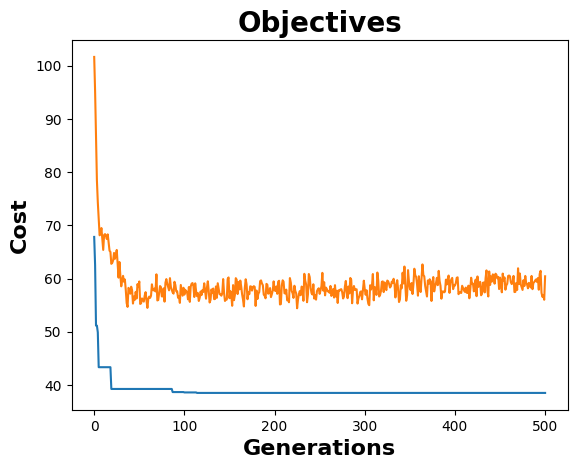

In [24]:
plt.plot(Best_Objectives)
plt.plot(Avg_Objectives)
plt.title('Objectives', fontsize=20, fontweight='bold')
plt.xlabel('Generations', fontsize=16, fontweight='bold')
plt.ylabel('Cost', fontsize=16, fontweight='bold')
plt.show()

In [25]:
def getNodeXY(solution):
    route_node_x=[]
    route_node_y=[]
    
    for i in solution:
        route_node_x.append(node_x[i-1])
        route_node_y.append(node_y[i-1])    
    route_node_x.append(node_x[solution[0]-1])
    route_node_y.append(node_y[solution[0]-1])
    return route_node_x, route_node_y


In [26]:
def plotRoute(route_node_x, route_node_y):
    fig = plt.figure(figsize=(5, 10))
    ax = plt.subplot(2, 1, 1)
    trans_offset = mtransforms.offset_copy(ax.transData, fig=fig, x=0.05, y=0.10, units='inches')
    i = 0
    for x, y in zip(node_x, node_y):
        plt.plot(x, y, 'ro')
        plt.text(x, y, cities[i], transform=trans_offset)
        i += 1
    plt.plot(route_node_x, route_node_y)
    plt.show()


Cost                : 62.52642866071767


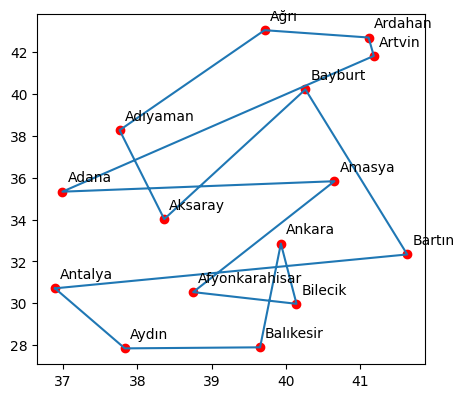

In [27]:
# 0. nesil
print('Cost                :', AllObjectives[0])
route_node_x, route_node_y = getNodeXY(AllSolutions[0])
plotRoute(route_node_x, route_node_y)

Cost                : 39.25299598888491


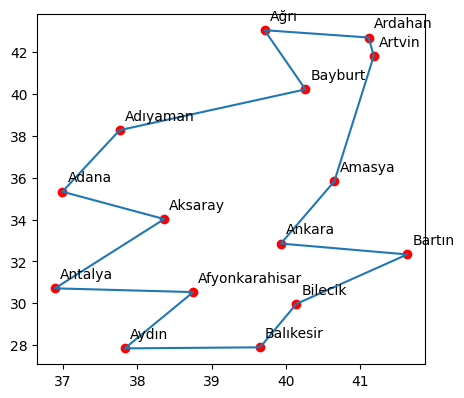

In [28]:
# 50.nesil
print('Cost                :', AllObjectives[49])
route_node_x, route_node_y = getNodeXY(AllSolutions[49])
plotRoute(route_node_x, route_node_y)

Cost                : 38.60146054259662


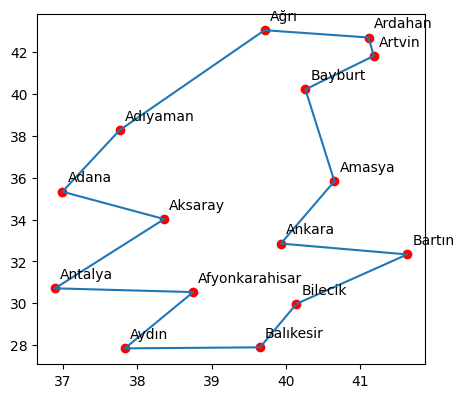

In [29]:
# 100.nesil
print('Cost                :', AllObjectives[99])
route_node_x, route_node_y = getNodeXY(AllSolutions[99])
plotRoute(route_node_x, route_node_y)

Cost                : 38.508730949728744


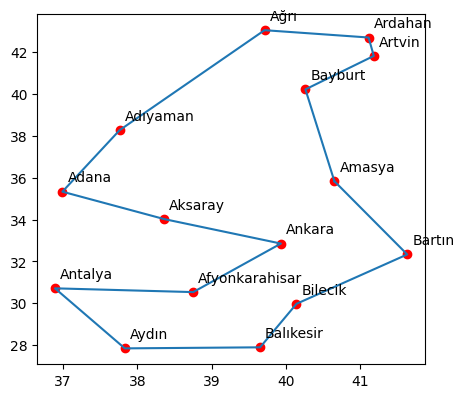

In [30]:
# 200. nesil
print('Cost                :', AllObjectives[199])
route_node_x, route_node_y = getNodeXY(AllSolutions[199])
plotRoute(route_node_x, route_node_y)

In [31]:
print()
print('####### Solution Output ########')
print('Best Solution       :', Best_Ever_Solution[0])
printRouteFromSolution(Best_Ever_Solution[0])
print()
print('Cost                :', Best_Ever_Solution[1])
print('Found at generation :', Best_Ever_Solution[2])
print('Known Best Solution :', Known_Best)
print('Gap                 : %.2f%%' % ((Best_Ever_Solution[1]-Known_Best)*100/Known_Best))
print()
print('####### Parameters ########')
print('Number of generations      : %s' % N_gen)
print('Population size            : %s' % P_size)
print('Probability of crossover   : %.0f%%' % (p_crossover*100))
print('Probability of mutation    : %.0f%%' % (p_mutation*100))
print('Tournament selection       : %s' % K)
print('Elitism selection          : %s' % E)


####### Solution Output ########
Best Solution       : [6, 14, 10, 9, 4, 2, 1, 5, 7, 3, 8, 11, 12, 15, 13]
Amasya, Bayburt, Artvin, Ardahan, Ağrı, Adıyaman, Adana, Aksaray, Ankara, Afyonkarahisar, Antalya, Aydın, Balıkesir, Bilecik, Bartın, 

Cost                : 38.508730949728744
Found at generation : 114
Known Best Solution : 38
Gap                 : 1.34%

####### Parameters ########
Number of generations      : 500
Population size            : 100
Probability of crossover   : 90%
Probability of mutation    : 10%
Tournament selection       : 5
Elitism selection          : 10


Cost                : 38.508730949728744


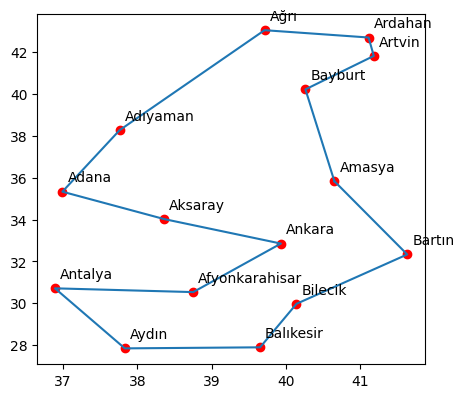

In [32]:
# en iyi sonuc
print('Cost                :', Best_Ever_Solution[1])
route_node_x, route_node_y = getNodeXY(Best_Ever_Solution[0])
plotRoute(route_node_x, route_node_y)